In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Понимание что такое производные

In [32]:
def f(x):
    # 6x - 4
    return 3*x**2 - 4*x + 5

In [5]:
f(3.0)

20.0

In [15]:
np.array(10)

array(10)

In [34]:
xs = np.arange(-5, 5, 0.5)
xs

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [35]:
ys = f(xs)
ys

array([100.  ,  83.75,  69.  ,  55.75,  44.  ,  33.75,  25.  ,  17.75,
        12.  ,   7.75,   5.  ,   3.75,   4.  ,   5.75,   9.  ,  13.75,
        20.  ,  27.75,  37.  ,  47.75])

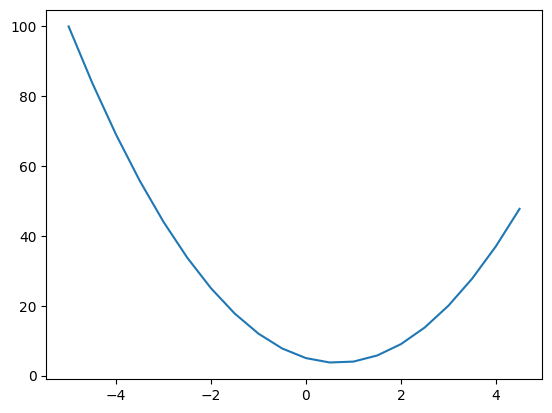

In [36]:
plt.plot(xs, ys)

Производная функция в точке - уровнение прямой описывающей касательную в этой точке. Описывается насколько изменится целевая функция при бесконечно малом изменении входящей в нее переменной (slope)

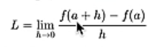

In [45]:
h = 0.0001
x = 3.0
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

20.0
20.001400030000006
14.000300000063248


In [46]:
h = 0.0001
x = -3.0
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

44.0
43.99780002999999
-21.999700000066014


In [48]:
h = 0.0001
x = 2/3
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/ h)

3.666666666666667
3.666666696666667
0.0002999999981767587


In [49]:
# Немного усложняем, добавляем больше переменных

a = 2.0
b = -3.0
c = 10

d = a*b + c
print(d)

4.0


Смотрим на прооизводные d по отношению к a b c

In [50]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
d2 = a*b + c

# ТК a - положительное число, умножаемое на b, негативное, то при умножении a мы будем получать чуть более негативное произведение, а значит результат уменьшится. отсюда slope - отрицательный
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
3.999699999999999
Slope: -3.000000000010772 


In [52]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
b += h
d2 = a*b + c

# ТК b - отрицательное число, умножаемое на положительное, увеличив его мы увеличим значение произведения и итоговой суммы, таким образом slope будет положительным
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
4.0002
Slope: 2.0000000000042206 


In [55]:
h = 0.0001

a = 2.0
b = -3.0
c = 10

d1 = a*b + c
c += h
d2 = a*b + c

# Тут slope примерно равен 1
print(d1)
print(d2)
print(f'Slope: {(d2 - d1) / h} ')

4.0
4.0001
Slope: 0.9999999999976694 


### Создание объекта Value который будет хранить в себе значения, градиенты, и все прочее для работы нейросети

In [56]:
class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f'Value: {self.data}'